<a href="https://colab.research.google.com/github/vignesh7-byte/DataMining/blob/main/2303A51640_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')



In [2]:
data=pd.read_csv("/content/multiple_linear_regression_dataset.csv")
print(data)


    age  experience  income
0    25           1   30450
1    30           3   35670
2    47           2   31580
3    32           5   40130
4    43          10   47830
5    51           7   41630
6    28           5   41340
7    33           4   37650
8    37           5   40250
9    39           8   45150
10   29           1   27840
11   47           9   46110
12   54           5   36720
13   51           4   34800
14   44          12   51300
15   41           6   38900
16   58          17   63600
17   23           1   30870
18   44           9   44190
19   37          10   48700


In [3]:
print("\nNull Values in Dataset:")
print(data.isnull().sum())



Null Values in Dataset:
age           0
experience    0
income        0
dtype: int64


In [4]:
print("\nMean:")
print(data.mean())
print("\nMedian:")
print(data.median())
print("\nMode:")
print(data.mode().iloc[0])


Mean:
age              39.65
experience        6.20
income        40735.50
dtype: float64

Median:
age              40.0
experience        5.0
income        40190.0
dtype: float64

Mode:
age              37.0
experience        5.0
income        27840.0
Name: 0, dtype: float64


In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [7]:
X_train_sm = sm.add_constant(X_train)
mlr = sm.OLS(y_train, X_train_sm).fit()
print(mlr.summary())
X_test_sm = sm.add_constant(X_test)
y_pred = mlr.predict(X_test_sm)


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     294.2
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.50e-11
Time:                        09:02:38   Log-Likelihood:                -136.74
No. Observations:                  16   AIC:                             279.5
Df Residuals:                      13   BIC:                             281.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.155e+04   1504.161     20.973      0.0

In [8]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)


In [9]:
print("\nMSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


MSE: 1731209.755348092
RMSE: 1315.7544434080746
R-squared: 0.9634729029423861
Adjusted R-squared: 0.8904187088271582


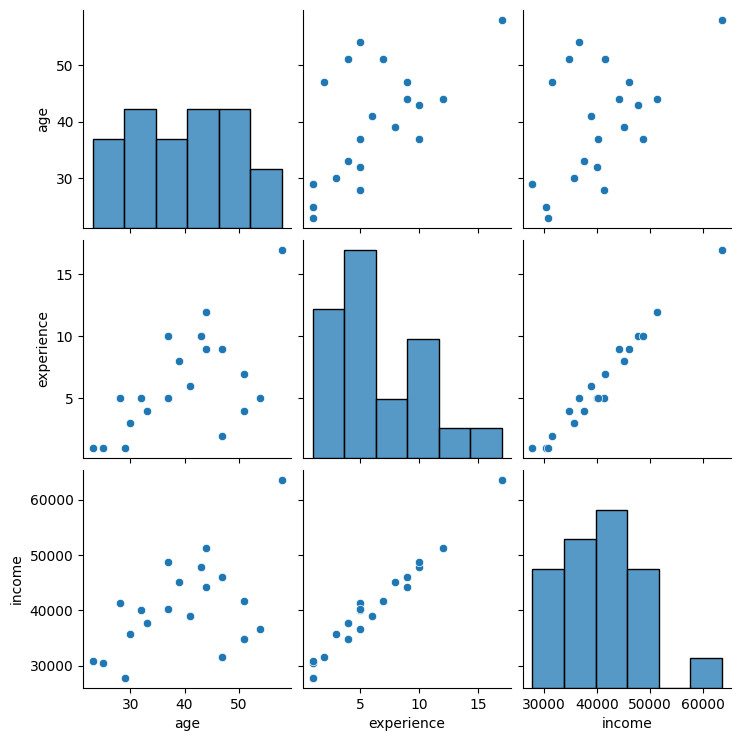

In [10]:
sns.pairplot(data)
plt.show()


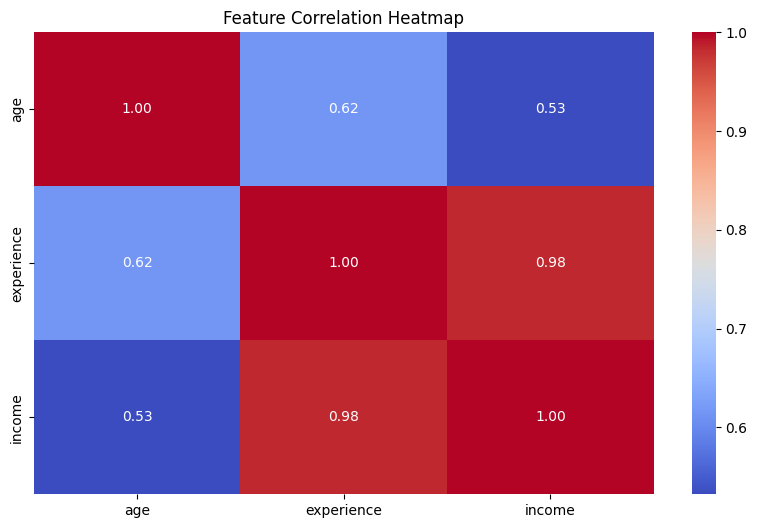

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()